<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#plt.style.use('seaborn-whitegrid')
'''
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 2
plt.rcParams['grid.color'] = "#cccccc"
'''

'\nplt.rcParams[\'axes.facecolor\'] = \'white\'\nplt.rcParams[\'axes.edgecolor\'] = \'white\'\nplt.rcParams[\'axes.grid\'] = True\nplt.rcParams[\'grid.alpha\'] = 2\nplt.rcParams[\'grid.color\'] = "#cccccc"\n'

In [4]:
nifty = pd.read_csv('/content/MMI_2021-12-23.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames


In [5]:
nifty.head(2)

,Date,MMI,Nifty
0,22/12/2021,35.004448,16955.45
1,21/12/2021,29.593027,16770.85
2,20/12/2021,28.864581,16614.20
3,17/12/2021,34.792173,16985.20
4,16/12/2021,36.541638,17248.40


In [6]:
data = pd.DataFrame({'Date':['24/12/2021','23/12/2021'] ,'MMI': [37.16,37.10],'Nifty':[17000,17072]})

In [7]:
nifty= pd.concat([data,nifty],axis=0)
nifty.head(3)

,Date,MMI,Nifty
0,24/12/2021,37.160000,17000.00
1,23/12/2021,37.100000,17072.00
0,22/12/2021,35.004448,16955.45
1,21/12/2021,29.593027,16770.85
2,20/12/2021,28.864581,16614.20


In [8]:
#len(nifty)

In [9]:
#nifty = nifty.iloc[1200:]

In [10]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [11]:
nifty.head(5)

,Date,MMI,Nifty
0,2021-12-24,37.160000,17000.00
1,2021-12-23,37.100000,17072.00
0,2021-12-22,35.004448,16955.45
1,2021-12-21,29.593027,16770.85
2,2021-12-20,28.864581,16614.20


In [12]:
#if TypeError:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
#else:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')  

In [13]:
nifty= nifty.set_index('Date')

In [14]:
#nifty.drop(nifty.index[1500:], inplace=True)

In [17]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [18]:
nifty['macd']=nifty['MMI'][::-1].ewm(span=50, adjust=False).mean()-nifty['MMI'][::-1].ewm(span=200, adjust=False).mean()
nifty['signal']=nifty['macd'].ewm(span=35,adjust=False).mean()
nifty['signal10']=nifty['macd'].ewm(span=10,adjust=False).mean()

In [33]:
nifty['45 Day'] = nifty['MMI'][::-1].rolling(window=45).mean()
nifty['20 Day'] = nifty['MMI'][::-1].rolling(window=20).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

# MMI Plot Vs Nifty

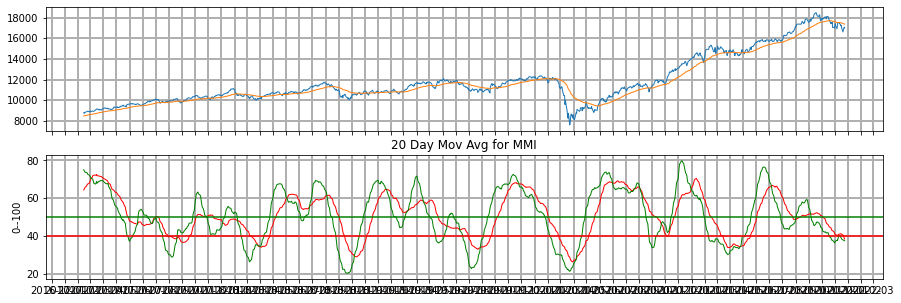

In [37]:
from matplotlib.dates import MonthLocator, YearLocator
t=1200
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['50 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['20 Day'].values[:t],color= 'g',linewidth=1 )
ax[1].axhline(y=50 , color= 'g')
ax[1].axhline(y=40 , color= 'r')
plt.title('20 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)
plt.show()

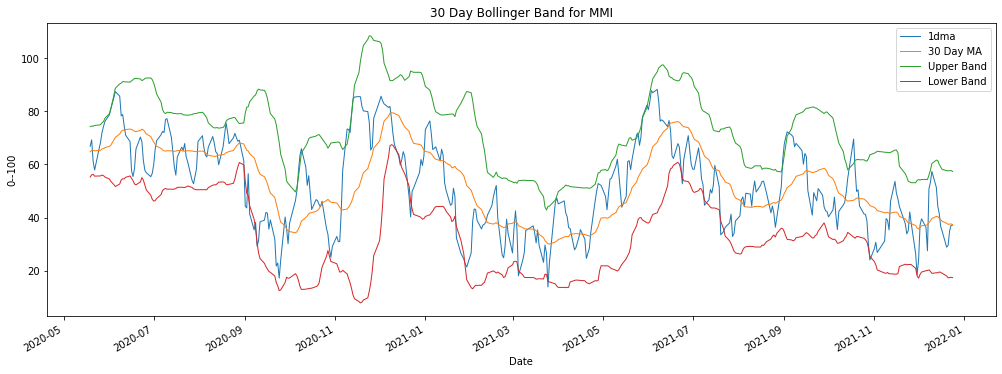

In [22]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
nifty['30 Day MA'] = nifty['MMI'][::-1].rolling(window=21).mean()

nifty['1dma'] = nifty['MMI'][::-1].rolling(window=1).mean()

# set .std(ddof=0) for population std instead of sample
nifty['30 Day STD'] = nifty['MMI'][::-1].rolling(window=21).std() 

nifty['Upper Band'] = nifty['30 Day MA'] + (nifty['30 Day STD'] *2)
nifty['Lower Band'] = nifty['30 Day MA'] - (nifty['30 Day STD'] *2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
nifty[['1dma','30 Day MA', 'Upper Band', 'Lower Band']][:400].plot(figsize=(17,6),linewidth=1)

plt.title('30 Day Bollinger Band for MMI')
plt.ylabel('0--100')


plt.savefig('bollingerband.png', dpi=150)

plt.show();

In [23]:
weekly_summary = pd.DataFrame()
#weekly_summary['Nifty'] = nifty[' Nifty Index'].resample('W').sum()
#weekly_summary['MMI'] = nifty[' Market Mood Index'].resample('W').sum()

In [24]:
weekly_summary = nifty.resample('W').last()

In [25]:
weekly_summary.tail()

,MMI,Nifty,macd,signal,signal10,50 Day,10 Day,50ema,30 Day MA,1dma,30 Day STD,Upper Band,Lower Band
Date,,,,,,,,,,,,,
2021-11-28,37.913453,17026.45,-5.619461,-6.633477,-6.551821,42.710325,37.546875,17644.491265,37.722088,37.913453,7.702089,53.126266,22.317910
2021-12-05,39.547833,17196.70,-7.197475,-6.673954,-6.837073,40.556633,37.226918,17557.758103,36.917895,39.547833,8.692416,54.302728,19.533063
2021-12-12,57.366474,17511.30,-6.227072,-6.495683,-6.153597,40.848778,39.886153,17516.384785,39.670734,57.366474,10.327569,60.325873,19.015596
2021-12-19,34.792173,16985.20,-6.003407,-6.691423,-6.534669,40.788939,38.310552,17463.168266,38.587627,34.792173,9.765409,58.118445,19.056810
2021-12-26,37.160000,17000.00,-6.770286,-6.770286,-6.770286,38.342100,37.361537,17359.437928,37.387819,37.160000,9.977567,57.342954,17.432684


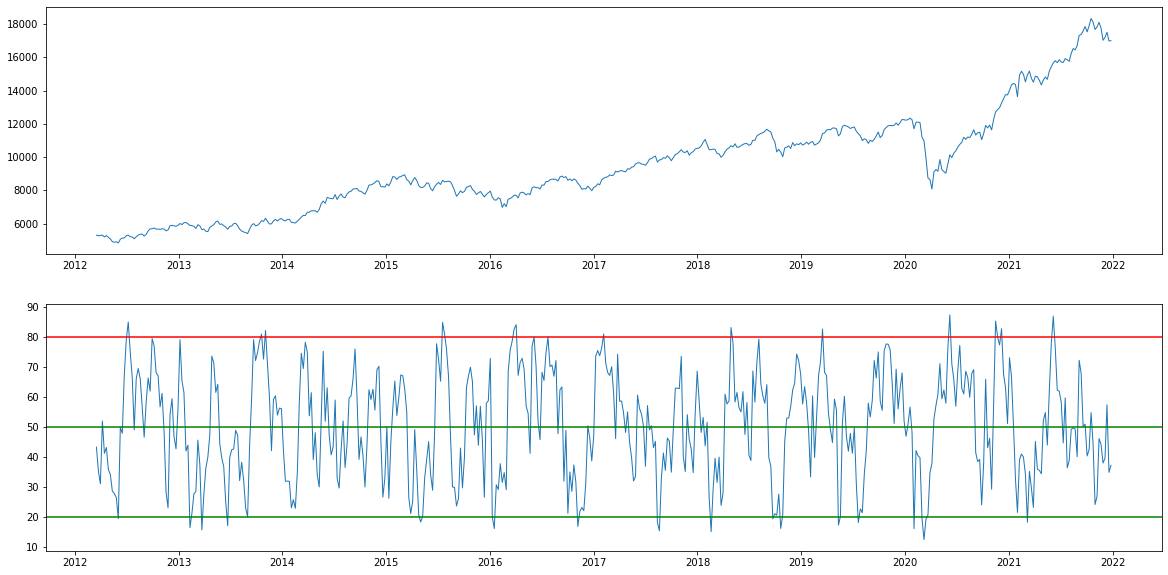

In [26]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(weekly_summary.index.values,weekly_summary['Nifty'].values,linewidth=1)
ax[1].plot(weekly_summary.index.values,weekly_summary['MMI'].values,linewidth=1)
ax[1].axhline(y=80 , color ='r')
ax[1].axhline(y=20 , color= 'g')
ax[1].axhline(y=50 , color= 'g')
fig.savefig('testWpng.png', dpi=150)
plt.show()

In [27]:
weekly_summary['13W'] = weekly_summary['MMI'].rolling(window=13).mean()
weekly_summary['26W'] = weekly_summary['MMI'].rolling(window=5).mean()

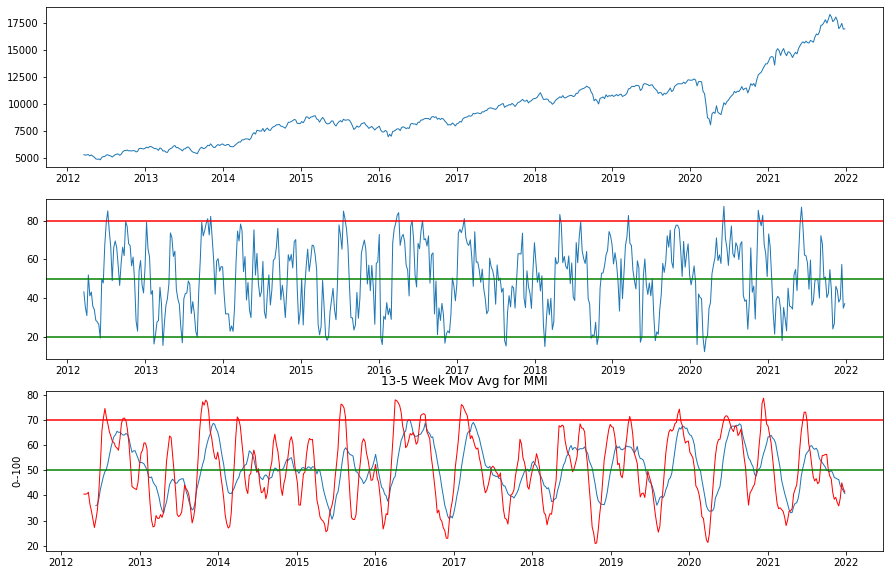

In [28]:
t=200
s=200
fig, ax = plt.subplots(3,1,figsize=(15,10))
ax[0].plot(weekly_summary.index.values,weekly_summary['Nifty'].values,linewidth=1 )
ax[1].plot(weekly_summary.index.values,weekly_summary['MMI'].values,linewidth=1)
ax[2].plot(weekly_summary.index.values,weekly_summary['13W'].values,linewidth=1)
ax[2].plot(weekly_summary.index.values,weekly_summary['26W'].values,'r',linewidth=1)
ax[1].axhline(y=80 , color ='r')
ax[1].axhline(y=20 , color= 'g')
ax[1].axhline(y=50 , color= 'g')
ax[2].axhline(y=50 , color= 'g')
ax[2].axhline(y=70 , color= 'r')
plt.title('13-5 Week Mov Avg for MMI')
plt.ylabel('0--100')
fig.savefig('weekly', dpi=150)
plt.show()

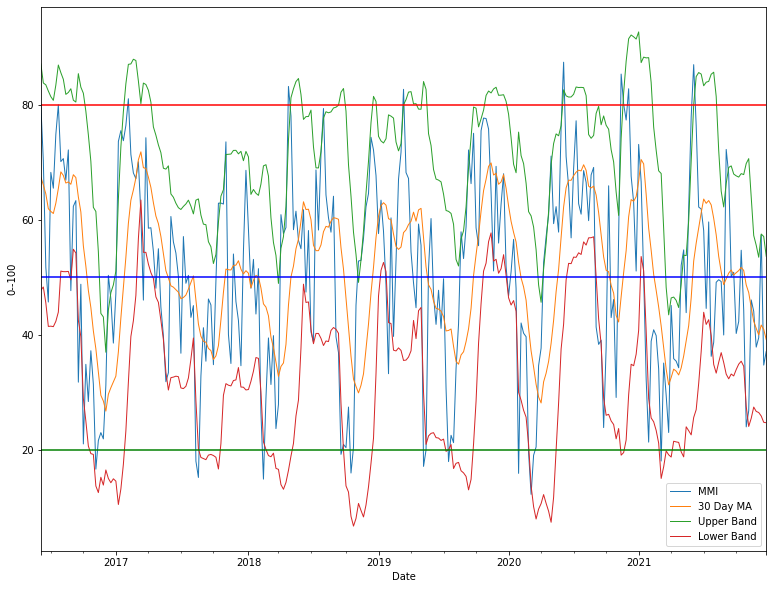

In [29]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band

weekly_summary['30 Day MA'] = weekly_summary['MMI'].rolling(window=10).mean()

# set .std(ddof=0) for population std instead of sample
weekly_summary['30 Day STD'] = weekly_summary['MMI'].rolling(window=10).std() 

weekly_summary['Upper Band'] = weekly_summary['30 Day MA'] + (weekly_summary['30 Day STD'] *1.5)
weekly_summary['Lower Band'] = weekly_summary['30 Day MA'] - (weekly_summary['30 Day STD'] *1.5)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
weekly_summary[['MMI', '30 Day MA', 'Upper Band', 'Lower Band']][220:].plot(figsize=(13,10),linewidth=1)
plt.axhline(80 , color='r')
plt.axhline(50 , color='b')
plt.axhline(20,color='g')
#plt.title('30 Day Bollinger Band for MMI')
plt.ylabel('0--100')


#plt.savefig('bollingerband.png', dpi=150)

plt.show();